<a href="https://colab.research.google.com/github/Patanjaligokhale/Projects/blob/Python/Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of pytorch's blocks for neural network
import matplotlib.pyplot as plt
import numpy as np
# check pytorch version
torch.__version__

'2.2.1+cu121'

In [ ]:
### Data preparation and loading

#Creating *known* parameters y= a+bX
weight = 0.7 #(b)
bias = 0.3 #(a)
start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim=1)
y = weight * X + bias








# Splitting data into training and testing sets



In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions."""

  plt.figure(figsize=(8,8))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot testing data in green
  plt.scatter(test_data,test_labels, c="g", s=4, label="testing data")

  #Check for predictions
  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  #Legend
  plt.legend(prop={"size":10});



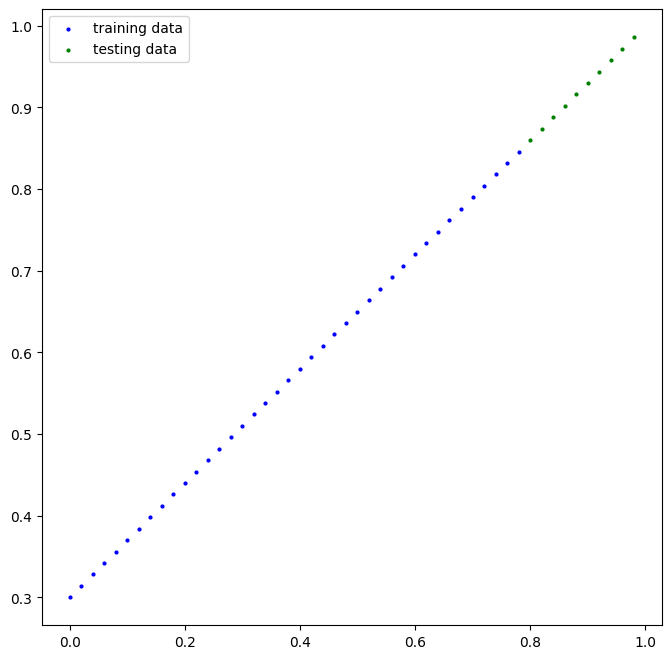

In [ ]:
plot_predictions();

### First PyTorch model

In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # model paramters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias
# If you have a nn.Module you should also have a forward method

###Pytorch module essentials


*    ***torch.nn*** - contains all the building blocks for the computational graphs.
*   ***torch.nn.Parameter*** - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us.
*  ***torch.nn.Module*** - The base class for all neural network modules,if you have this you also need an Forward() method.
*  ***def forward()*** - All nn.Module subclasses require you to write this method as it defines what happens in the forward computation, in the above case it returns the computation of the basic linear regression eqn, y = a + b*X.




In [ ]:
# creating a random seed
torch.manual_seed(42)

#Creating an instance of a model
model_0 = LinearRegressionModel()
#Check parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Making predictions using torch.inference_mode()

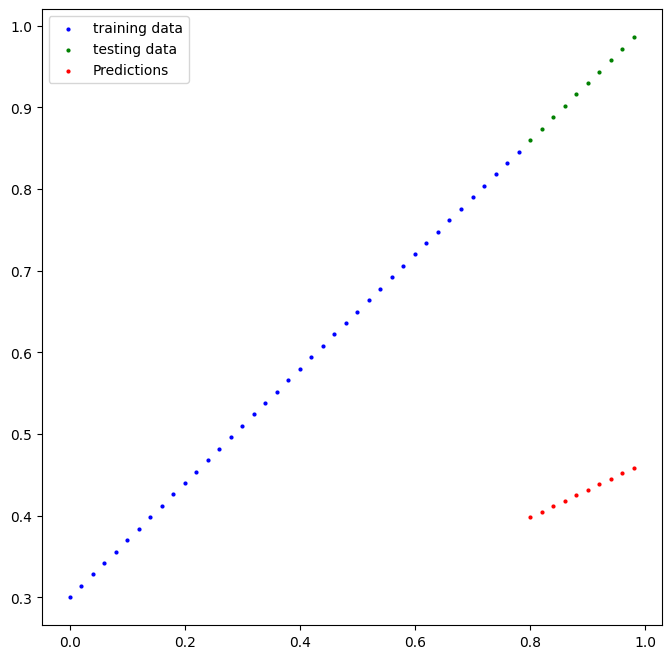

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, y_test
plot_predictions(predictions=y_preds)

## Train model:

### #Things needed to train models:

*   Loss Function - one way to measure how wrong the model's predictions are to use loss functions

*  Optimizer - Takes into account the loss of a model and adjusts the model's parameters(eg. weight and bias) to improve the loss function.

and we need the following in pytorch:
* A training loop
* A testing loop



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setting up loss function
loss_fn = nn.L1Loss()

#setting an optimizer(Stoichastic Gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)


### Building the training and testing loop

Steps in training loop:

* Loop through the data
* Forward pass(involves data moving through the function defined by us) to make predictions.
* Calculate the loss(compare forward pass predictions to actual values).
* Optimizer zero grad
* Loss backward
* Optimzer step

In [ ]:
epochs = 200 # an epoch is one loop through the data

#for tracking values
epoch_count = []
loss_values = []
test_loss_values = []


#0. Loop through the data
for epoch in range(epochs) :
  # set the model to training mode
  model_0.train()
  #1. Forward pass
  y_pred = model_0(X_train)

  #2. loss calculation
  loss= loss_fn(y_pred, y_train)
  #print(f"Loss:{loss}")

  #3. Optimizer
  optimizer.zero_grad()

  #4. Backpropogation
  loss.backward()

  #5. Step the optimizer(perform gradient descent)
  optimizer.step()

  #6 Printing out model state
  if epoch % 10 == 0:
    print(model_0.state_dict())


  ## Testing
  model_0.eval()# turns off different settings in the model that aren't needed
  with torch.inference_mode():    # turns off the gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Loss calculation
    test_loss = loss_fn(test_pred, y_test)

    #print out the progress
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch:{epoch} | Test:{loss}| Test loss:{test_loss}")


OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:0 | Test:0.31288138031959534| Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:10 | Test:0.1976713240146637| Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:20 | Test:0.08908725529909134| Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:30 | Test:0.053148526698350906| Test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:40 | Test:0.04543796554207802| Test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:50 | Test:0.04167863354086876| Test loss:0.09919948130846024
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:60 | Test:0.03818932920694351| Test loss:0.08886633068323135
OrderedDict([('weights

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

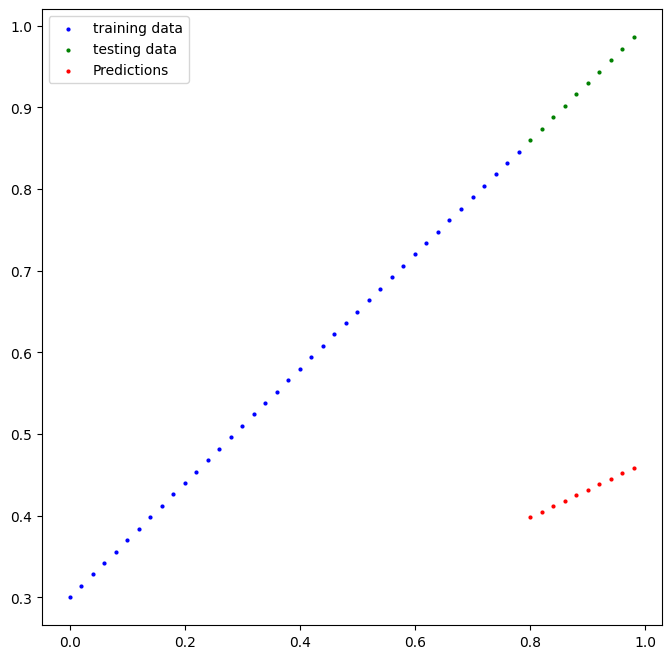

In [ ]:
plot_predictions(predictions=y_preds)

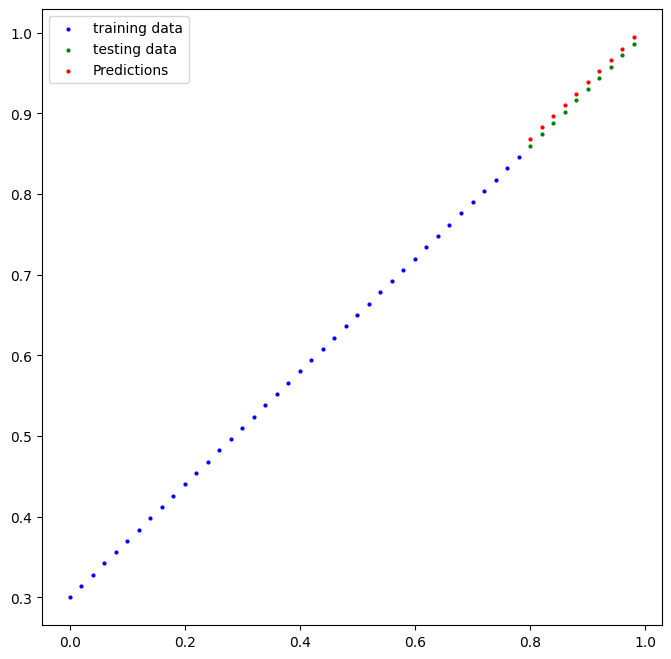

In [ ]:
plot_predictions(predictions=y_preds_new); #reducing error betwwen ideal outcomes and model's predictioins using backpropogation and gradient descent

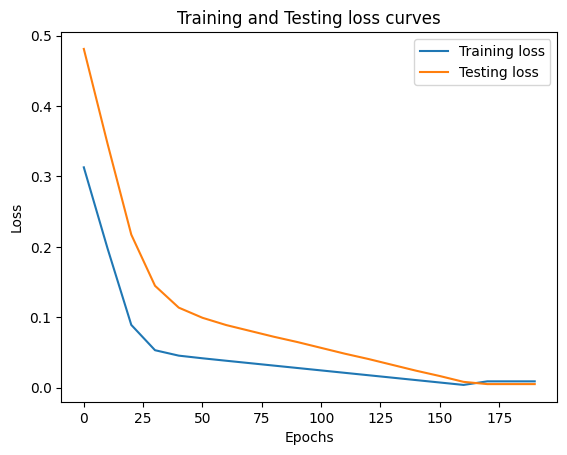

In [ ]:
#Plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training loss")
plt.plot(epoch_count, test_loss_values, label="Testing loss")
plt.title("Training and Testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### Saving and loading a model in PyTorch

Three main ways to save a model:
1. torch.save()- allows you to save a pytorch object in Python's pickle format.
2. torch.load() - loading the PyTorch model.
3. torch.nn.module.load_state_dict() - allows you to load a model's saved state dictionary.

In [ ]:
# Saving the PyTorch model
from pathlib import Path

# 1.Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)    #mkdir-> make a new directory

# 2. Create model sdave path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"  #.pth or .pt common convention for pytorch files
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME  # actual path

# 3. Save the model using "state dict"
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


##Loading

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Loading the saved state_dict of model_0(this will update the new instance with the updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Making predictions on the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Comparing the loaded model with the orignal model predictions
loaded_model_preds == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Practising the above steps


In [ ]:
# Creating some linear data

weight=0.5
bias = 0.5

#Creating range values
start = 0
end = 1
step = 0.02

# Creating features and labels
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cuda


In [ ]:
#data splitting
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#visualizing
#plot_predictions();


In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Using nn.Linear() for creating model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
    # Forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#next(model_1.parameters()).device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Loss fn new
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# setting the number of epochs
epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  #train
  model_1.train()

  #1. forward pass
  y_pred = model_1(X_train)

  #2. Calculating the loss
  loss = loss_fn(y_pred, y_train)

  #3. optimizer zero_gradient
  optimizer.zero_grad()

  #4. backward loss
  loss.backward()

  #5. optimizer step
  optimizer.step()


  ## Testing
  model_1.eval()

  with torch.inference_mode():

    #1. Forward pass
    test_preds = model_1(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch %100 ==0:
    print(f"Epoch: {epoch} | Train loss = {loss} | Test loss = {test_loss}" )


Epoch: 0 | Train loss = 0.4331779479980469 | Test loss = 0.551976203918457
Epoch: 100 | Train loss = 0.001309715211391449 | Test loss = 0.0015560031170025468
Epoch: 200 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
Epoch: 300 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
Epoch: 400 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
Epoch: 500 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
Epoch: 600 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
Epoch: 700 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
Epoch: 800 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
Epoch: 900 | Train loss = 0.003234918462112546 | Test loss = 0.008021748624742031
